__Our Goals of the Case Study:__

- To **build a logistic regression model to assign a lead score** between 0 and 100 to each of the leads which can be used by the company to target potential leads.
- To **adjust to if the company's requirement changes** in the future so you will need to handle these as well.

__The steps are broadly:__
1. Read and understand the data
2. Clean the data
3. Prepare the data for Model Building
4. Model Building
5. Model Evaluation
6. Making Predictions on the Test Set

In [238]:
# Importing libraries --


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [239]:
import warnings
warnings.filterwarnings("ignore")

In [240]:
# loading dataset

df = pd.read_csv("Leads.csv")

In [241]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,66aef816-5a5f-45ed-ae66-98fd21166203,628308,Lead Add Form,Reference,No,No,1,0.0,0,0.0,...,No,Potential Lead,Select,NaN,NaN,NaN,NaN,No,No,SMS Sent
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,5461778b-3604-4675-90f5-d997fe11bc29,627462,Lead Add Form,Reference,No,No,1,NaN,1447,NaN,...,No,Potential Lead,Select,NaN,NaN,NaN,NaN,No,No,Modified


In [242]:
# Checking shape of data
df.shape

(9240, 37)

In [243]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [244]:
# Checking for null percentages in data

round(100*df.isnull().sum()/len(df),2).sort_values(ascending  = False)

Lead Quality                                     51.59
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Tags                                             36.29
Lead Profile                                     29.32
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

In [245]:
df.Specialization.value_counts()

Specialization
Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

In [246]:
df.Country.value_counts()

Country
India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
Canada                     4
South Africa               4
Germany                    4
Nigeria                    4
Sweden                     3
Asia/Pacific Region        2
Netherlands                2
Uganda                     2
Belgium                    2
Italy                      2
Bangladesh                 2
China                      2
Ghana                      2
Philippines                2
Switzerland                1
Indonesia                  1
Vietnam                    1
Denmark                    1
Russia                     1
Liberia                    1
Malays

In [247]:
df['How did you hear about X Education'].value_counts()

How did you hear about X Education
Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: count, dtype: int64


In our dataset, the value 'Select' appears as a default placeholder in several columns. This indicates unselected options in form dropdowns. We need to replace these 'Select' values with NaN to ensure data quality and consistency.

Target Columns:

- Specialization
- How did you hear about X Education
- Lead Profile
- City

In [248]:
df = df.replace("Select" , np.nan)

In [249]:
# Checking the shape, info() after replacing Select values --

In [250]:
df.shape

(9240, 37)

In [251]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [252]:
# Checking for percentage of nulls in dataset

In [253]:
round(100*df.isnull().sum()/len(df),2).sort_values(ascending  = False)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Index                       45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

In [254]:
# Dropping cols having nulls greater than 45%

df = df.loc[:, df.isnull().mean() < 0.45]

In [255]:
df.shape

(9240, 30)

In [256]:
round(100*df.isnull().sum()/len(df),2).sort_values(ascending  = False)

City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Through Recommendations                           0.00
Receive More Updates About Our Courses            0.00
Prospect ID                                       0.00
Newspaper                                         0.00
Update me on Supply Chain Content                 0.00
Get updates on DM Content                         0.00
I agree to pay the amount through cheque          0.00
A free copy of Mastering The Interview            0.00
Digital Ad

In [257]:
# Imputing mean,median, mode values accordingly to respective features



In [258]:
#City

df.City.value_counts()

City
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: count, dtype: int64

In [259]:
df.City.mode()

0    Mumbai
Name: City, dtype: object

In [260]:
df['City'].fillna('Mumbai' , inplace = True)

In [261]:
#  checking for null percent

round(100*df.isnull().sum()/len(df),2).sort_values(ascending  = False)

Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Through Recommendations                           0.00
Receive More Updates About Our Courses            0.00
Prospect ID                                       0.00
Newspaper                                         0.00
Update me on Supply Chain Content                 0.00
Get updates on DM Content                         0.00
City                                              0.00
I agree to pay the amount through cheque          0.00
A free copy of Mastering The Interview            0.00
Digital Ad

In [262]:
df.Specialization.value_counts()

Specialization
Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: count, dtype: int64

In [263]:
df['Specialization'].mode()

0    Finance Management
Name: Specialization, dtype: object

In [264]:
df['Specialization'].fillna('Finance Management' , inplace = True)

In [265]:
#  checking for null percent

round(100*df.isnull().sum()/len(df),2).sort_values(ascending  = False)

Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Through Recommendations                           0.00
Receive More Updates About Our Courses            0.00
Prospect ID                                       0.00
Newspaper                                         0.00
Update me on Supply Chain Content                 0.00
Get updates on DM Content                         0.00
City                                              0.00
I agree to pay the amount through cheque          0.00
A free copy of Mastering The Interview            0.00
Digital Advertisement                             0.00
Search    

In [266]:
df["Tags"].value_counts()

Tags
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to O

In [267]:
df.Tags.mode()

0    Will revert after reading the email
Name: Tags, dtype: object

In [268]:
#  checking for null percent

round(100*df.isnull().sum()/len(df),2).sort_values(ascending  = False)

Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Through Recommendations                           0.00
Receive More Updates About Our Courses            0.00
Prospect ID                                       0.00
Newspaper                                         0.00
Update me on Supply Chain Content                 0.00
Get updates on DM Content                         0.00
City                                              0.00
I agree to pay the amount through cheque          0.00
A free copy of Mastering The Interview            0.00
Digital Advertisement                             0.00
Search    

In [269]:
df['What matters most to you in choosing a course'].value_counts(normalize = True).mul(100)

What matters most to you in choosing a course
Better Career Prospects      99.954065
Flexibility & Convenience     0.030623
Other                         0.015312
Name: proportion, dtype: float64

In [270]:
# When a column has 99% of one response, it adds little value. Dropping it simplifies the dataset.

In [271]:
df=df.drop("What matters most to you in choosing a course",axis=1)

In [272]:
df["What is your current occupation"].value_counts()

What is your current occupation
Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

In [273]:
df["What is your current occupation"].mode()

0    Unemployed
Name: What is your current occupation, dtype: object

In [274]:
df['What is your current occupation'].fillna('Unemployed' , inplace = True)

In [275]:
#  checking for null percent

round(100*df.isnull().sum()/len(df),2).sort_values(ascending  = False)

Tags                                        36.29
Country                                     26.63
TotalVisits                                  1.48
Page Views Per Visit                         1.48
Last Activity                                1.11
Lead Source                                  0.39
Prospect ID                                  0.00
Digital Advertisement                        0.00
Through Recommendations                      0.00
Receive More Updates About Our Courses       0.00
Update me on Supply Chain Content            0.00
X Education Forums                           0.00
Get updates on DM Content                    0.00
City                                         0.00
I agree to pay the amount through cheque     0.00
A free copy of Mastering The Interview       0.00
Newspaper                                    0.00
Search                                       0.00
Newspaper Article                            0.00
Magazine                                     0.00


In [276]:
df.Country.value_counts()

Country
India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
Canada                     4
South Africa               4
Germany                    4
Nigeria                    4
Sweden                     3
Asia/Pacific Region        2
Netherlands                2
Uganda                     2
Belgium                    2
Italy                      2
Bangladesh                 2
China                      2
Ghana                      2
Philippines                2
Switzerland                1
Indonesia                  1
Vietnam                    1
Denmark                    1
Russia                     1
Liberia                    1
Malays

In [277]:
df.Country.mode()[0]

'India'

In [278]:
df['Country'].fillna( df.Country.mode()[0], inplace = True)

In [279]:
#  checking for null percent

round(100*df.isnull().sum()/len(df),2).sort_values(ascending  = False)

Tags                                        36.29
TotalVisits                                  1.48
Page Views Per Visit                         1.48
Last Activity                                1.11
Lead Source                                  0.39
Prospect ID                                  0.00
X Education Forums                           0.00
A free copy of Mastering The Interview       0.00
I agree to pay the amount through cheque     0.00
City                                         0.00
Get updates on DM Content                    0.00
Update me on Supply Chain Content            0.00
Receive More Updates About Our Courses       0.00
Through Recommendations                      0.00
Digital Advertisement                        0.00
Newspaper                                    0.00
Search                                       0.00
Newspaper Article                            0.00
Magazine                                     0.00
Lead Number                                  0.00


In [280]:
df['TotalVisits'].describe()

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

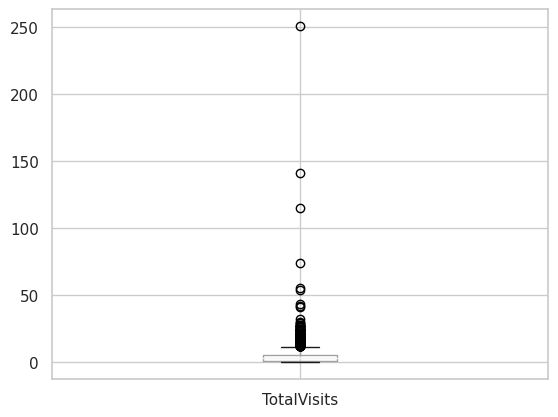

In [281]:
df.boxplot(column='TotalVisits')

# Display the plot
plt.show()

In [282]:
df['TotalVisits'].fillna(df['TotalVisits'].median(), inplace=True)

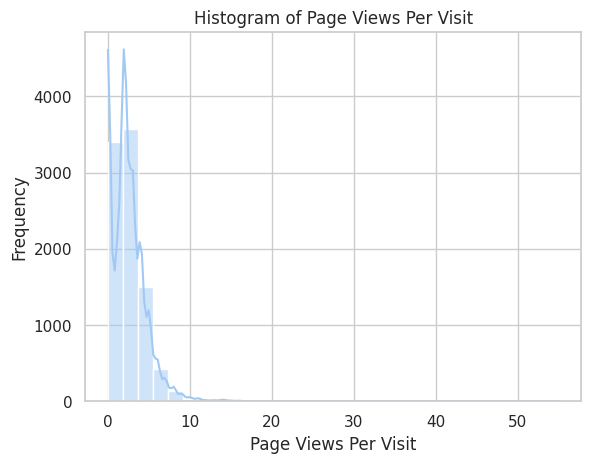

In [283]:
sns.histplot(df["Page Views Per Visit"], bins=30, kde=True)
plt.title("Histogram of Page Views Per Visit")
plt.xlabel("Page Views Per Visit")
plt.ylabel("Frequency")
plt.show()

In [284]:
df['Page Views Per Visit'].fillna(df['Page Views Per Visit'].median(), inplace = True)

In [285]:
round(100*df.isnull().sum()/len(df),2).sort_values(ascending  = False)

Tags                                        36.29
Last Activity                                1.11
Lead Source                                  0.39
Prospect ID                                  0.00
Newspaper Article                            0.00
A free copy of Mastering The Interview       0.00
I agree to pay the amount through cheque     0.00
City                                         0.00
Get updates on DM Content                    0.00
Update me on Supply Chain Content            0.00
Receive More Updates About Our Courses       0.00
Through Recommendations                      0.00
Digital Advertisement                        0.00
Newspaper                                    0.00
X Education Forums                           0.00
Search                                       0.00
Magazine                                     0.00
Lead Number                                  0.00
What is your current occupation              0.00
Specialization                               0.00


In [286]:
df['Last Activity'].value_counts()

Last Activity
Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: count, dtype: int64

In [287]:
df['Last Activity'].fillna(df['Last Activity'].mode()[0] , inplace = True)

In [288]:
df['Lead Source'].value_counts()

Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Live Chat               2
Press_Release           2
Social Media            2
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
youtubechannel          1
testone                 1
NC_EDM                  1
blog                    1
Name: count, dtype: int64

In [289]:
df['Lead Source'].fillna(df['Lead Source'].mode()[0] , inplace = True)

In [290]:
df.isna().sum()

Prospect ID                                    0
Lead Number                                    0
Lead Origin                                    0
Lead Source                                    0
Do Not Email                                   0
Do Not Call                                    0
Converted                                      0
TotalVisits                                    0
Total Time Spent on Website                    0
Page Views Per Visit                           0
Last Activity                                  0
Country                                        0
Specialization                                 0
What is your current occupation                0
Search                                         0
Magazine                                       0
Newspaper Article                              0
X Education Forums                             0
Newspaper                                      0
Digital Advertisement                          0
Through Recommendati

In [291]:
df.shape

(9240, 29)

In [292]:
# We've ensured that our dataset is now free of any null values, making it ready
# for further analysis.

In [293]:
# We will remove Lead Number and Prospect ID from the dataset as they are just
# indexes and do not contribute to the regression model's predictive power.

df.drop(["Prospect ID", "Lead Number"], axis = 1, inplace = True)

In [294]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 27 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Lead Origin                               9240 non-null   object 
 1   Lead Source                               9240 non-null   object 
 2   Do Not Email                              9240 non-null   object 
 3   Do Not Call                               9240 non-null   object 
 4   Converted                                 9240 non-null   int64  
 5   TotalVisits                               9240 non-null   float64
 6   Total Time Spent on Website               9240 non-null   int64  
 7   Page Views Per Visit                      9240 non-null   float64
 8   Last Activity                             9240 non-null   object 
 9   Country                                   9240 non-null   object 
 10  Specialization                      

In [295]:
# Data proportion of leads

df['Converted'].value_counts(normalize = True).mul(100)

Converted
0    61.461039
1    38.538961
Name: proportion, dtype: float64

In [296]:
# Proportion of leads that were converted

(sum(df["Converted"]) / len(df["Converted"])) * 100

38.53896103896104


The lead conversion rate stands at roughly 38%, highlighting a notable success rate in converting leads.

In [297]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 27 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Lead Origin                               9240 non-null   object 
 1   Lead Source                               9240 non-null   object 
 2   Do Not Email                              9240 non-null   object 
 3   Do Not Call                               9240 non-null   object 
 4   Converted                                 9240 non-null   int64  
 5   TotalVisits                               9240 non-null   float64
 6   Total Time Spent on Website               9240 non-null   int64  
 7   Page Views Per Visit                      9240 non-null   float64
 8   Last Activity                             9240 non-null   object 
 9   Country                                   9240 non-null   object 
 10  Specialization                      

In [298]:
# Lead origin with respect to COnverted leads

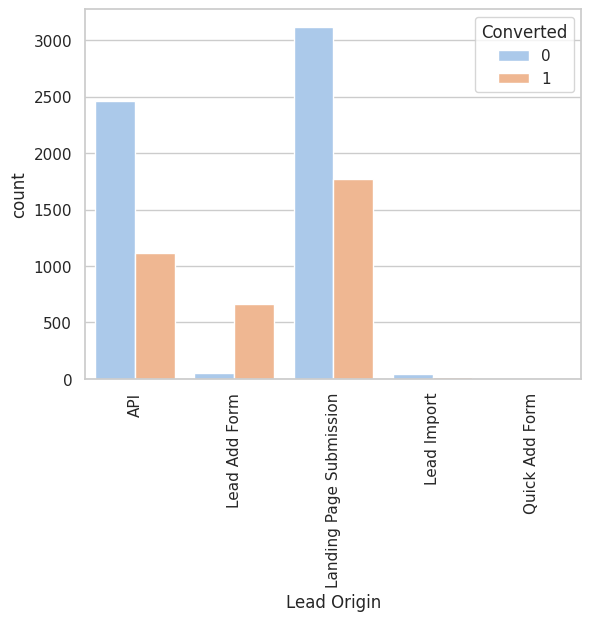

In [299]:
sns.set(style="whitegrid", palette="pastel")
sns.countplot(x="Lead Origin", hue="Converted", data=df)
plt.xticks(rotation=90)
plt.show()


- "API" and "Landing Page Submission" are the most common lead origins.
- "Lead Add Form" and "Lead Import" contribute less to the lead pool.

In [300]:
df.groupby('Lead Origin')['Converted'].agg(lambda x: (x.mean()) * 100)

Lead Origin
API                         31.145251
Landing Page Submission     36.185018
Lead Add Form               92.479109
Lead Import                 23.636364
Quick Add Form             100.000000
Name: Converted, dtype: float64

In [301]:
# API and Landing Page Submission: have a moderate conversion rate, ranging from 30% to 35%.

# Lead Add Form: boasts an impressive conversion rate of over 90%.
# However, the number of leads originating from this source is relatively low.

# Lead Import: Both the count and conversion rate for leads from this source are notably low.

In [302]:
# Lead Source with respect to COnverted leads

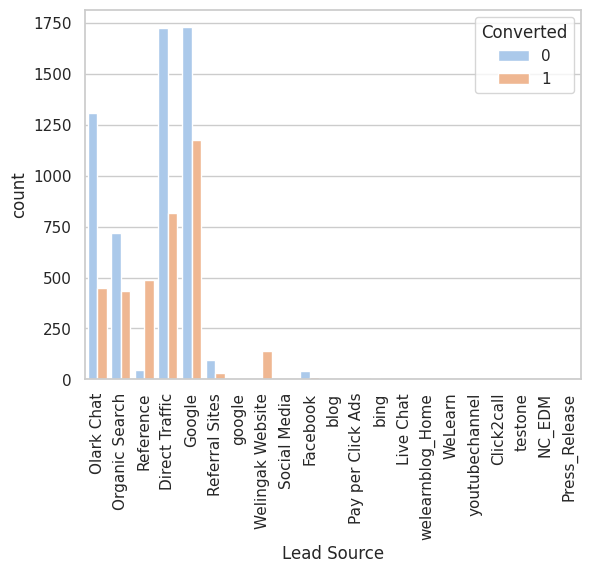

In [303]:
sns.set(style="whitegrid", palette="pastel")
sns.countplot(x="Lead Source", hue="Converted", data=df)
plt.xticks(rotation=90)
plt.show()

In [304]:
# It appears that 'Google' is inconsistently represented as 'google'
# dataset, leading to potential duplicates and hindering our analysis.
# rectify this issue:

In [305]:
# Correct 'Google' representation
df['Lead Source'] = df['Lead Source'].apply(lambda x: 'Google' if x.lower() == 'google' else x)


In [306]:
df.groupby('Lead Source')['Converted'].mean() * 100

Lead Source
Click2call            75.000000
Direct Traffic        32.166732
Facebook              23.636364
Google                40.426263
Live Chat            100.000000
NC_EDM               100.000000
Olark Chat            25.527066
Organic Search        37.781629
Pay per Click Ads      0.000000
Press_Release          0.000000
Reference             91.760300
Referral Sites        24.800000
Social Media          50.000000
WeLearn              100.000000
Welingak Website      98.591549
bing                  16.666667
blog                   0.000000
testone                0.000000
welearnblog_Home       0.000000
youtubechannel         0.000000
Name: Converted, dtype: float64

In [307]:
df['Lead Source'].value_counts()

Lead Source
Google               2909
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
Click2call              4
Live Chat               2
Press_Release           2
Social Media            2
blog                    1
welearnblog_Home        1
WeLearn                 1
youtubechannel          1
testone                 1
NC_EDM                  1
Pay per Click Ads       1
Name: count, dtype: int64

In [308]:
# We need to group Lead Sources with low values under a new category called 'Others' to simplify our analysis.

In [309]:
df['Lead Source'] = df['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads','Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')

In [310]:
df['Lead Source'].value_counts()

Lead Source
Google              2909
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Facebook              55
Others                23
Name: count, dtype: int64

In [311]:
# seems good now, plot lead source for converted leads

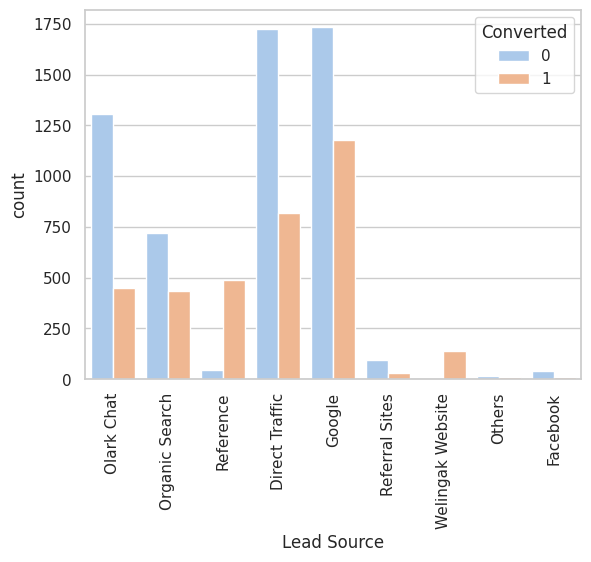

In [312]:
sns.set(style="whitegrid", palette="pastel")
sns.countplot(x="Lead Source", hue="Converted", data=df)
plt.xticks(rotation=90)
plt.show()

Top Three Lead Sources:

- Google
- Direct Traffic
- Olark Chat

Significant Lead Sources:

- Reference
- Organic Search
- Welingak Website
- Referral Sites

Highest Conversion Rate:

- Reference
- Welingak Website
- Direct Traffic

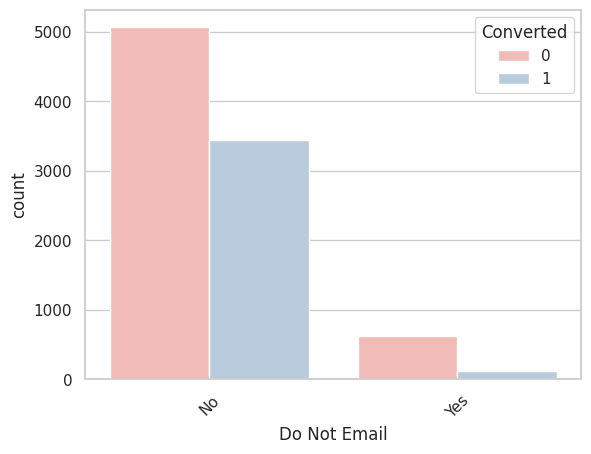

In [313]:
# Do not email with respect to converted leads

sns.countplot(x="Do Not Email", hue="Converted", data=df, palette='Pastel1'); plt.xticks(rotation=45); plt.show()


In [314]:
df.groupby('Do Not Email')['Converted'].mean() * 100

Do Not Email
No     40.477310
Yes    16.076294
Name: Converted, dtype: float64

In [315]:
# Leads who opt not to receive emails tend to have a higher likelihood of not converting compared to those who allow email communication.

In [316]:
df["Do Not Email"].value_counts()

Do Not Email
No     8506
Yes     734
Name: count, dtype: int64

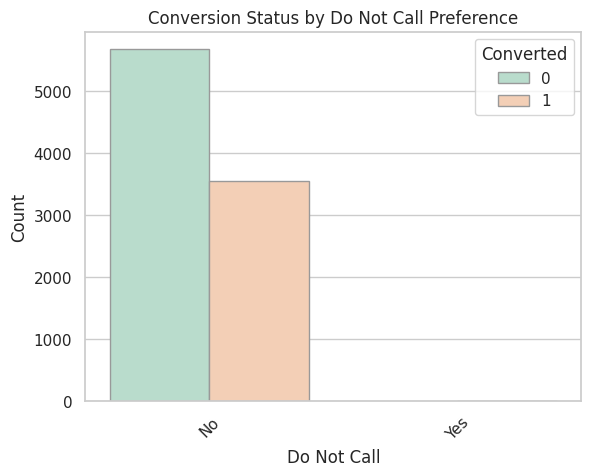

In [317]:
# Do Not Call with respect to converted leads

sns.countplot(x="Do Not Call", hue="Converted", data=df, palette='Pastel2', edgecolor=".6")
plt.xticks(rotation=45)
plt.xlabel("Do Not Call")
plt.ylabel("Count")
plt.title("Conversion Status by Do Not Call Preference")
plt.legend(title='Converted')
plt.show()

In [318]:
#Since the "Do Not Call" column is heavily skewed, it might not offer much useful information for our analysis.
# Removing it could simplify our data without losing important insights.

In [319]:
df["Do Not Call"].value_counts()

Do Not Call
No     9238
Yes       2
Name: count, dtype: int64

In [320]:
df.drop("Do Not Call", axis=1)

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,India,Finance Management,...,No,No,No,Interested in other courses,No,No,Mumbai,No,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,India,Finance Management,...,No,No,No,Ringing,No,No,Mumbai,No,No,Email Opened
2,Lead Add Form,Reference,No,1,0.0,0,0.0,SMS Sent,India,Travel and Tourism,...,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,SMS Sent
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,...,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,Lead Add Form,Reference,No,1,3.0,1447,2.0,Email Opened,India,Travel and Tourism,...,No,No,No,Closed by Horizzon,No,No,Mumbai,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,API,Google,No,1,2.0,1171,1.0,Email Opened,India,Finance Management,...,No,No,No,NaN,No,No,Mumbai,No,No,Email Opened
9236,Landing Page Submission,Direct Traffic,No,0,2.0,238,2.0,SMS Sent,India,Media and Advertising,...,No,No,No,wrong number given,No,No,Mumbai,No,Yes,SMS Sent
9237,Landing Page Submission,Direct Traffic,Yes,0,2.0,199,2.0,SMS Sent,India,Business Administration,...,No,No,No,invalid number,No,No,Mumbai,No,Yes,SMS Sent
9238,API,Direct Traffic,No,1,8.0,1011,8.0,SMS Sent,India,Finance Management,...,No,No,No,NaN,No,No,Mumbai,No,No,SMS Sent


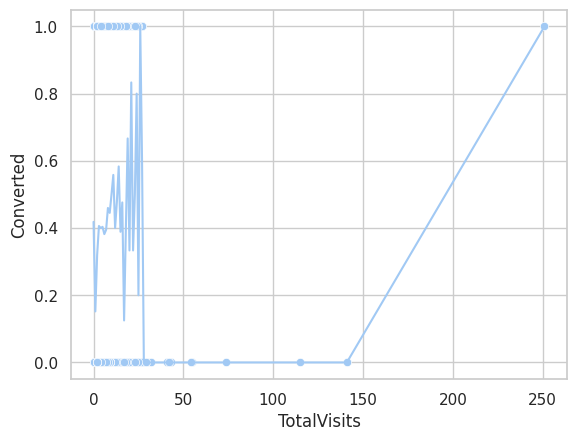

In [321]:
# Total Visits with respect to Converted leads

sns.scatterplot(x='TotalVisits', y='Converted', data=df)
sns.lineplot(x='TotalVisits', y='Converted', data=df, ci=None)
plt.show()

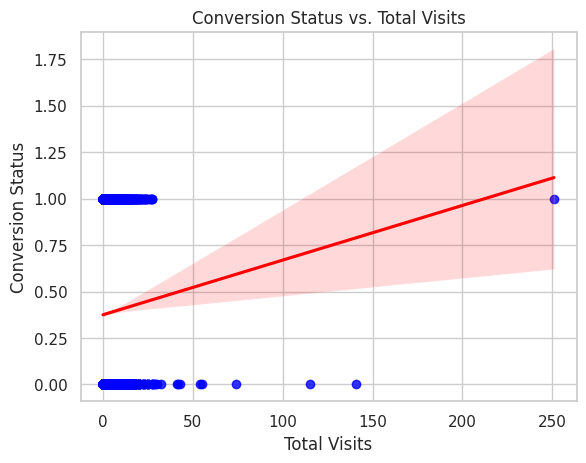

In [322]:
sns.regplot(x='TotalVisits', y='Converted', data=df, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.xlabel("Total Visits")
plt.ylabel("Conversion Status")
plt.title("Conversion Status vs. Total Visits")
plt.show()

In [323]:
# Total Visits alone may not be a reliable predictor of conversion.

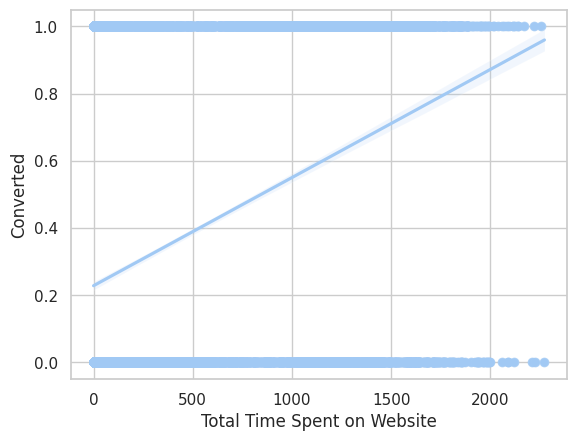

In [324]:
# Total Time Spent on Website with respected to converted leads

sns.scatterplot(x='Total Time Spent on Website', y='Converted', data=df)
sns.regplot(x='Total Time Spent on Website', y='Converted', data=df)
plt.show()

In [325]:
# Engaging website experiences can increase lead conversion by encouraging longer visit durations.

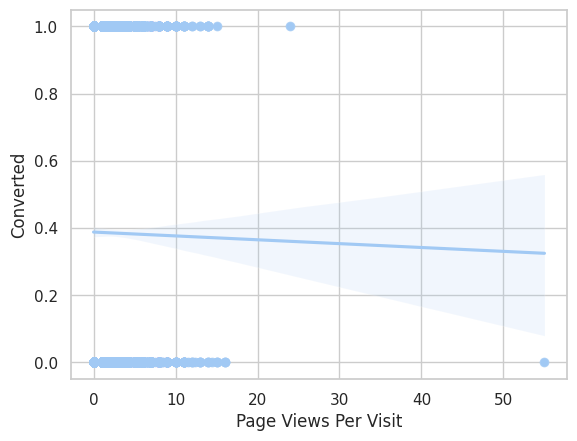

In [326]:
#  Page Views Per Visit with respect to Converted leads

sns.scatterplot(x='Page Views Per Visit', y='Converted', data=df)
sns.regplot(x='Page Views Per Visit', y='Converted', data=df)
plt.show()

In [327]:
# Page Views Per Visit alone may not be a reliable predictor of conversion.

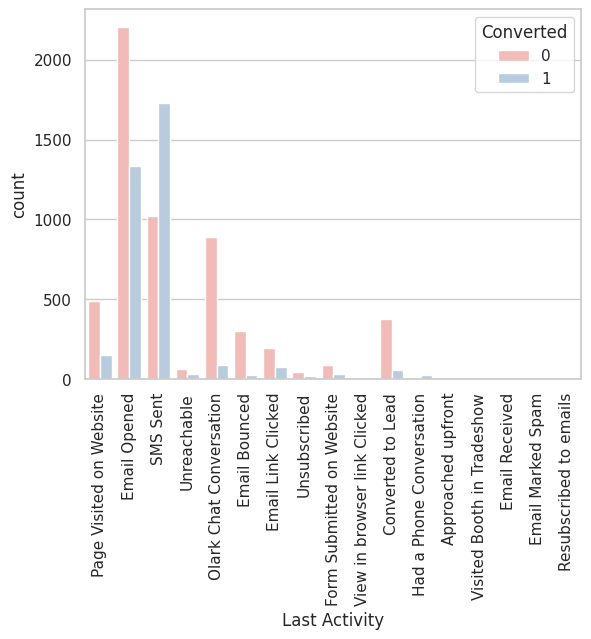

In [328]:
#  Last Activity with respect to Converted leads

sns.countplot(x="Last Activity", hue="Converted", data=df, palette='Pastel1'); plt.xticks(rotation=90)
plt.show()

In [329]:
df["Last Activity"].value_counts()

Last Activity
Email Opened                    3540
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: count, dtype: int64

In [330]:
# We need to group Lead Sources with low values under a new category called 'Others' to simplify our analysis.

In [331]:
df['Last Activity'] = df['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked',
                                                    'Visited Booth in Tradeshow', 'Approached upfront',
                                                    'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Others')

In [332]:
df["Last Activity"].value_counts()

Last Activity
Email Opened                 3540
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Email Link Clicked            267
Form Submitted on Website     116
Unreachable                    93
Unsubscribed                   61
Others                         51
Name: count, dtype: int64

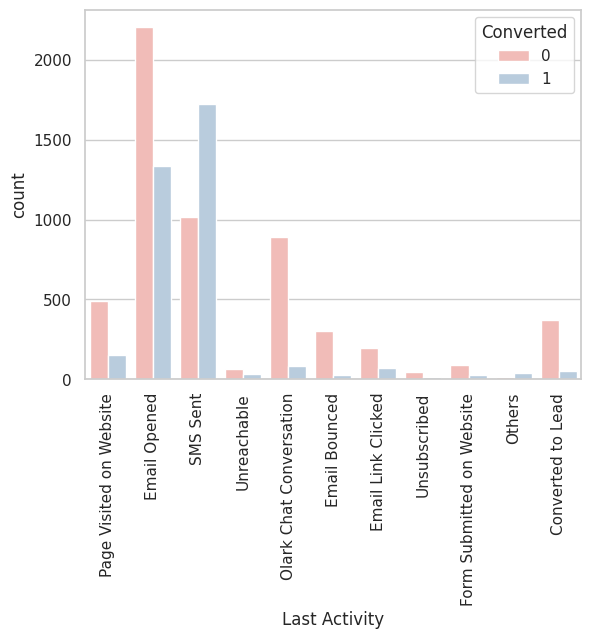

In [333]:
sns.countplot(x="Last Activity", hue="Converted", data=df, palette='Pastel1'); plt.xticks(rotation=90)
plt.show()

- Emails and SMSes often lead to conversions, while other activities are less effective.
- Clicking email links, submitting forms, and visiting pages also help, but not as much as emails and SMSes.

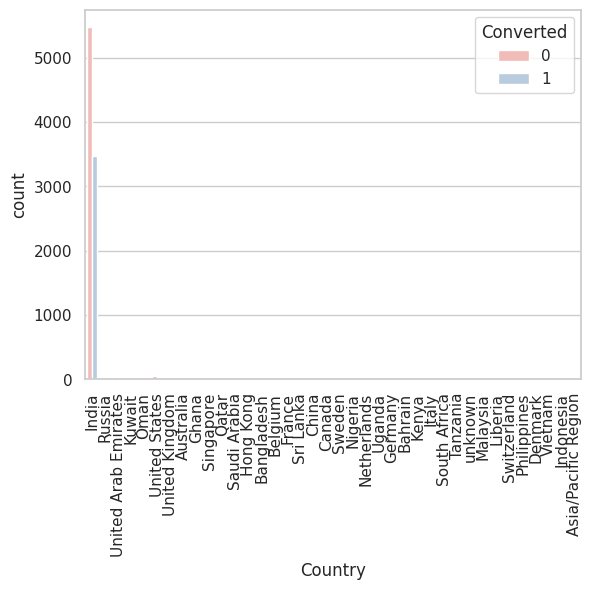

In [334]:
# Country with respect to Converted leads

sns.countplot(x="Country", hue="Converted", data=df, palette='Pastel1'); plt.xticks(rotation=90)
plt.show()

In [335]:
df['Country'] = ['Others' if country != 'India' else country for country in df['Country']]


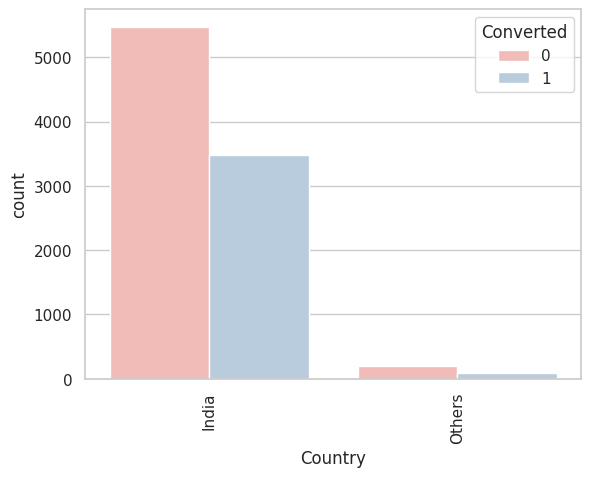

In [336]:
sns.countplot(x="Country", hue="Converted", data=df, palette='Pastel1'); plt.xticks(rotation=90)
plt.show()

In [337]:
df["Country"].value_counts()

Country
India     8953
Others     287
Name: count, dtype: int64

In [338]:
# data is highly skewed as most leads are from India


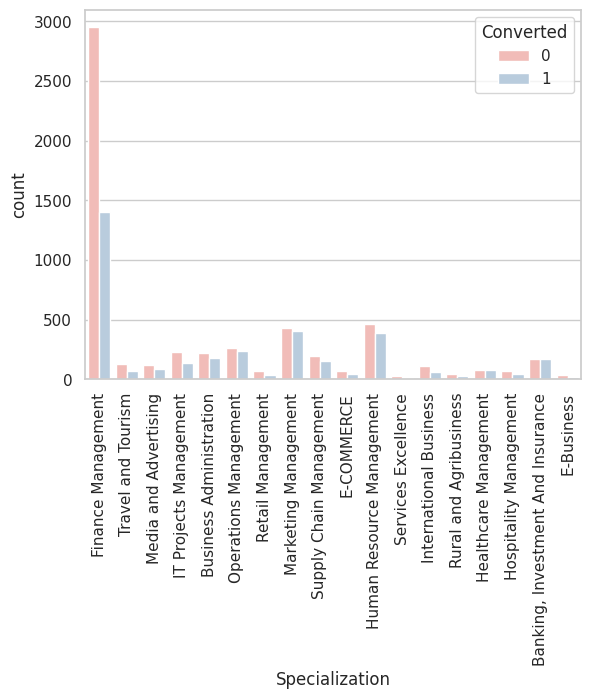

In [339]:
# Specialization with respect to Converted leads

sns.countplot(x="Specialization", hue="Converted", data=df, palette='Pastel1'); plt.xticks(rotation=90)
plt.show()

In [340]:
df.groupby('Specialization')['Converted'].mean() * 100

Specialization
Banking, Investment And Insurance    49.408284
Business Administration              44.416873
E-Business                           36.842105
E-COMMERCE                           35.714286
Finance Management                   32.254362
Healthcare Management                49.685535
Hospitality Management               42.105263
Human Resource Management            45.754717
IT Projects Management               38.251366
International Business               35.955056
Marketing Management                 48.687351
Media and Advertising                41.871921
Operations Management                47.316103
Retail Management                    34.000000
Rural and Agribusiness               42.465753
Services Excellence                  27.500000
Supply Chain Management              43.266476
Travel and Tourism                   35.467980
Name: Converted, dtype: float64

The plot indicates a diverse range of specializations among leads, with
various fields represented.

-  Specializations generally have conversion rates between 25% and 50%.
-  We should prioritize those with rates above 40%.

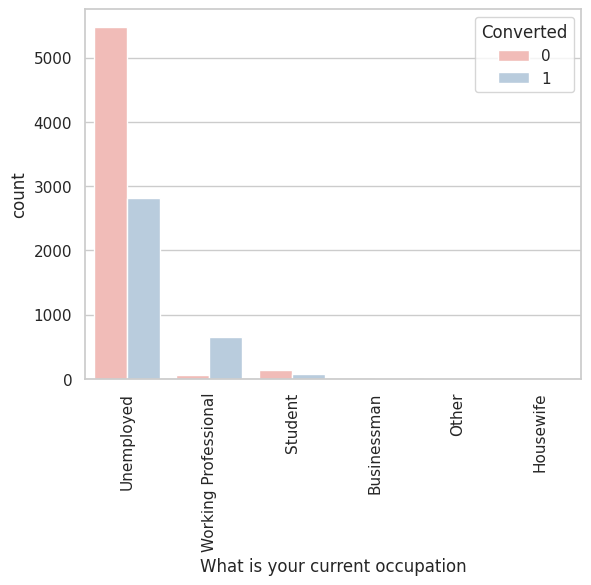

In [341]:
#  Occupation with respect to Converted leads

sns.countplot(x="What is your current occupation", hue="Converted", data=df, palette='Pastel1'); plt.xticks(rotation=90)
plt.show()

In [342]:
df.groupby('What is your current occupation')['Converted'].mean() * 100

What is your current occupation
Businessman              62.500000
Housewife               100.000000
Other                    62.500000
Student                  37.142857
Unemployed               33.908323
Working Professional     91.643059
Name: Converted, dtype: float64

In [343]:
df["What is your current occupation"].value_counts()

What is your current occupation
Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

The majority of responses come from the Unemployed category, with a conversion rate of approximately 35%. Conversely, categories like Working Professional, Businessman, and Housewives have fewer responses but higher conversion rates.

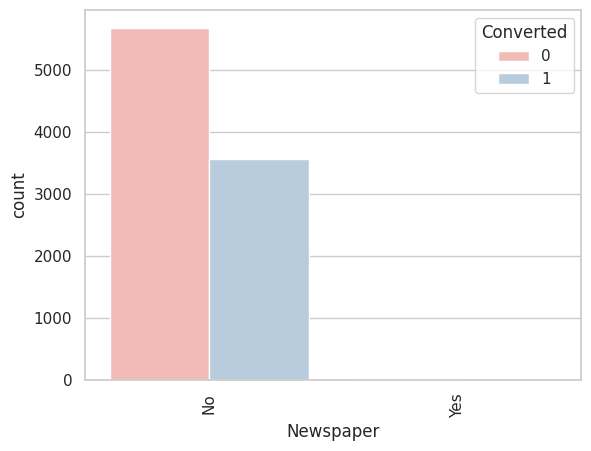

In [344]:
#  Newspaper with respect to Converted leads

sns.countplot(x="Newspaper", hue="Converted", data=df, palette='Pastel1'); plt.xticks(rotation=90)
plt.show()


In [345]:
df.groupby('Newspaper')['Converted'].mean() * 100

Newspaper
No     38.543132
Yes     0.000000
Name: Converted, dtype: float64

The majority of responses indicate "No," with a conversion rate of around 38%. However, no significant inference can be drawn from this column.








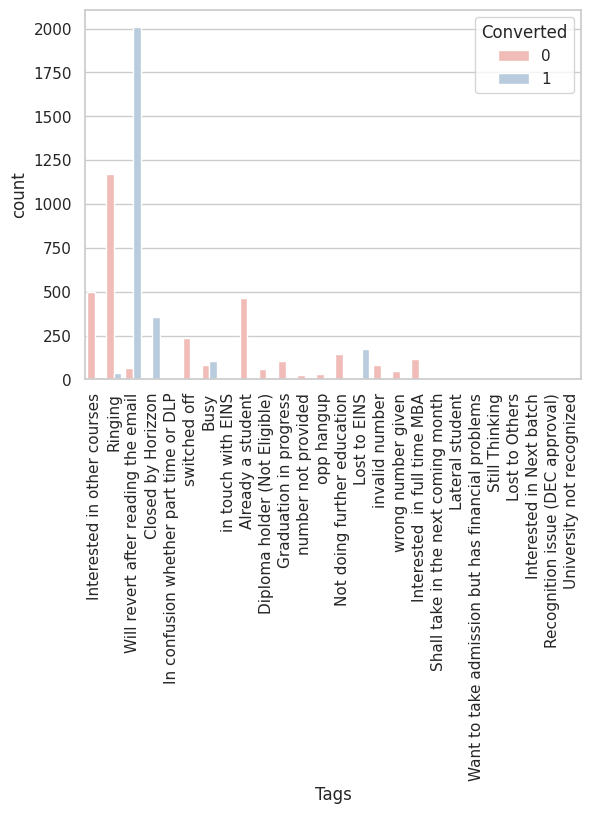

In [346]:
# Tags with respect toConverted leads

sns.countplot(x="Tags", hue="Converted", data=df, palette='Pastel1'); plt.xticks(rotation=90)
plt.show()


In [347]:
round((df.groupby('Tags')['Converted'].mean() * 100),2)

Tags
Already a student                                      0.65
Busy                                                  56.45
Closed by Horizzon                                    99.44
Diploma holder (Not Eligible)                          1.59
Graduation in progress                                 6.31
In confusion whether part time or DLP                 20.00
Interested  in full time MBA                           2.56
Interested in Next batch                             100.00
Interested in other courses                            2.53
Lateral student                                      100.00
Lost to EINS                                          97.71
Lost to Others                                         0.00
Not doing further education                            0.69
Recognition issue (DEC approval)                       0.00
Ringing                                                2.83
Shall take in the next coming month                   50.00
Still Thinking                     

The column represents tags generated by the sales team for analysis purposes.
These tags, although useful for sales analysis, are not suitable for model building.
Hence we remove this column

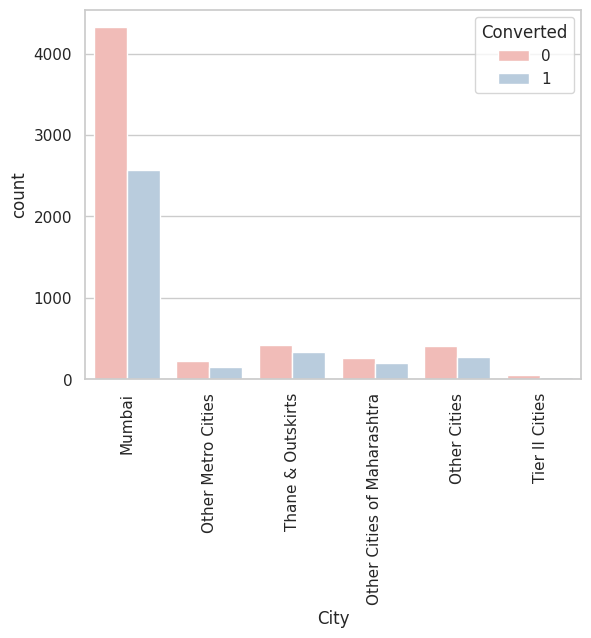

In [348]:
# City with respect to Converted leads

sns.countplot(x="City", hue="Converted", data=df, palette='Pastel1'); plt.xticks(rotation=90)
plt.show()


In [349]:
df.groupby('City')['Converted'].mean() * 100

City
Mumbai                         37.236976
Other Cities                   40.233236
Other Cities of Maharashtra    43.982495
Other Metro Cities             40.789474
Thane & Outskirts              44.946809
Tier II Cities                 33.783784
Name: Converted, dtype: float64

In [350]:
# The majority of responses, approximately 85%, are from Mumbai, which includes Thane and other cities in Maharashtra.
# However, the conversion rate for these responses is around 36%.

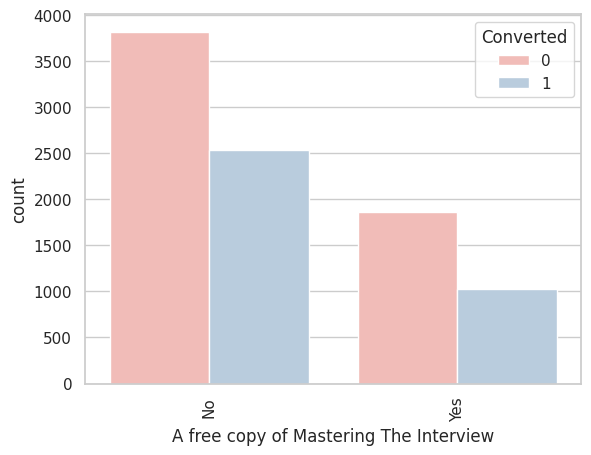

In [351]:
# A free copy of Mastering The Interview with respect to converted leads

sns.countplot(x="A free copy of Mastering The Interview", hue="Converted", data=df, palette='Pastel1'); plt.xticks(rotation=90)
plt.show()


In [352]:
df.groupby('A free copy of Mastering The Interview')['Converted'].mean() * 100

A free copy of Mastering The Interview
No     39.845718
Yes    35.664820
Name: Converted, dtype: float64

Although the majority of responses are "No" (68%), the conversion rate is around 38%. However, no significant inference can be drawn from this column.

In [353]:
# Removing columns based on above data and carry on further analysis

In [354]:
df = df.drop(['Tags', 'Search', 'Country','Magazine', 'Newspaper Article',
                                'X Education Forums', 'Newspaper', 'Digital Advertisement',
                                'Through Recommendations', 'Receive More Updates About Our Courses',
                                'Update me on Supply Chain Content', 'Get updates on DM Content',
                                'I agree to pay the amount through cheque',
                                'A free copy of Mastering The Interview'], axis=1)

In [355]:
df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Specialization',
       'What is your current occupation', 'City', 'Last Notable Activity'],
      dtype='object')

In [356]:
df.shape

(9240, 13)

In [357]:
df[['Do Not Email', 'Do Not Call']] = df[['Do Not Email', 'Do Not Call']].apply(lambda x: x.map({'Yes': 1, 'No': 0}))


Creating Dummy Varibales for Categorical variables

In [358]:
df["Last Notable Activity"].value_counts()

Last Notable Activity
Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Resubscribed to emails             1
Name: count, dtype: int64

In [359]:
df['Last Notable Activity'] = df['Last Notable Activity'].replace(['Email Received', 'Response B', 'Form Submitted on Website', 'View in browser link Clicked', 'Resubscribed to emails', 'Approached upfront', 'Email Marked Spam', 'Had a Phone Conversation', 'Unreachable', 'Unsubscribed', 'Email Bounced', 'Email Link Clicked', 'Olark Chat Conversation', 'Page Visited on Website'], 'Other')


In [360]:
df["Last Notable Activity"].value_counts()

Last Notable Activity
Modified        3407
Email Opened    2827
SMS Sent        2172
Other            834
Name: count, dtype: int64

In [361]:
dummy = pd.get_dummies(df[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization', 'What is your current occupation', 'City', 'Last Notable Activity']], drop_first=False).astype(int)


In [362]:
dummy.head(5)

,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,...,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Other,Last Notable Activity_SMS Sent
0,1,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0,1,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0


In [363]:
dummy.shape

(9240, 59)

In [364]:
df = pd.concat([df, dummy], axis=1)
df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,...,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Other,Last Notable Activity_SMS Sent
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Finance Management,...,1,0,0,0,0,0,0,1,0,0
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Finance Management,...,1,0,0,0,0,0,1,0,0,0
2,Lead Add Form,Reference,0,0,1,0.0,0,0.0,SMS Sent,Travel and Tourism,...,1,0,0,0,0,0,0,0,0,1
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Media and Advertising,...,1,0,0,0,0,0,0,1,0,0
4,Lead Add Form,Reference,0,0,1,3.0,1447,2.0,Email Opened,Travel and Tourism,...,1,0,0,0,0,0,0,1,0,0


In [365]:
df.shape

(9240, 72)

In [366]:
df = df.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                             'City','Last Notable Activity'], axis = 1)

In [367]:
df.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Other,Last Notable Activity_SMS Sent
0,0,0,0,0.0,0,0.0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
1,0,0,0,5.0,674,2.5,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
2,0,0,1,0.0,0,0.0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,0,0,0,1.0,305,1.0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0,0,1,3.0,1447,2.0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0


In [368]:
df.shape

(9240, 65)

In [369]:
df.columns

Index(['Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_API', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Others',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Specialization_Banking, Inves

### Test-Train Split

The splitting the dataset into training an testing sets.

In [370]:
from sklearn.model_selection import train_test_split

In [371]:
# Put all the feature variables in X

X = df.drop(['Converted'], axis=1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,...,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Other,Last Notable Activity_SMS Sent
0,0,0,0.0,0,0.0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
1,0,0,5.0,674,2.5,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
2,0,0,0.0,0,0.0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0,0,1.0,305,1.0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0,0,3.0,1447,2.0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0


In [372]:
# Put the target variable in y

y = df['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [373]:
# Split the dataset into 70% train and 30% test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

#####There are several numeric variables in the dataset that are on different scales. Therefore, let's proceed with scaling these variables to ensure consistency

In [374]:
# Import MinMax scaler

from sklearn.preprocessing import MinMaxScaler

In [375]:
# Scale the three numeric features present in the dataset

scaler = MinMaxScaler()

X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,...,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Other,Last Notable Activity_SMS Sent
1871,0,0,0.000000,0.000000,0.000000,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
6795,0,0,0.028369,0.214349,0.024182,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
3516,0,0,0.035461,0.046655,0.045455,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
8105,0,0,0.035461,0.541373,0.090909,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3934,0,0,0.000000,0.000000,0.000000,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0


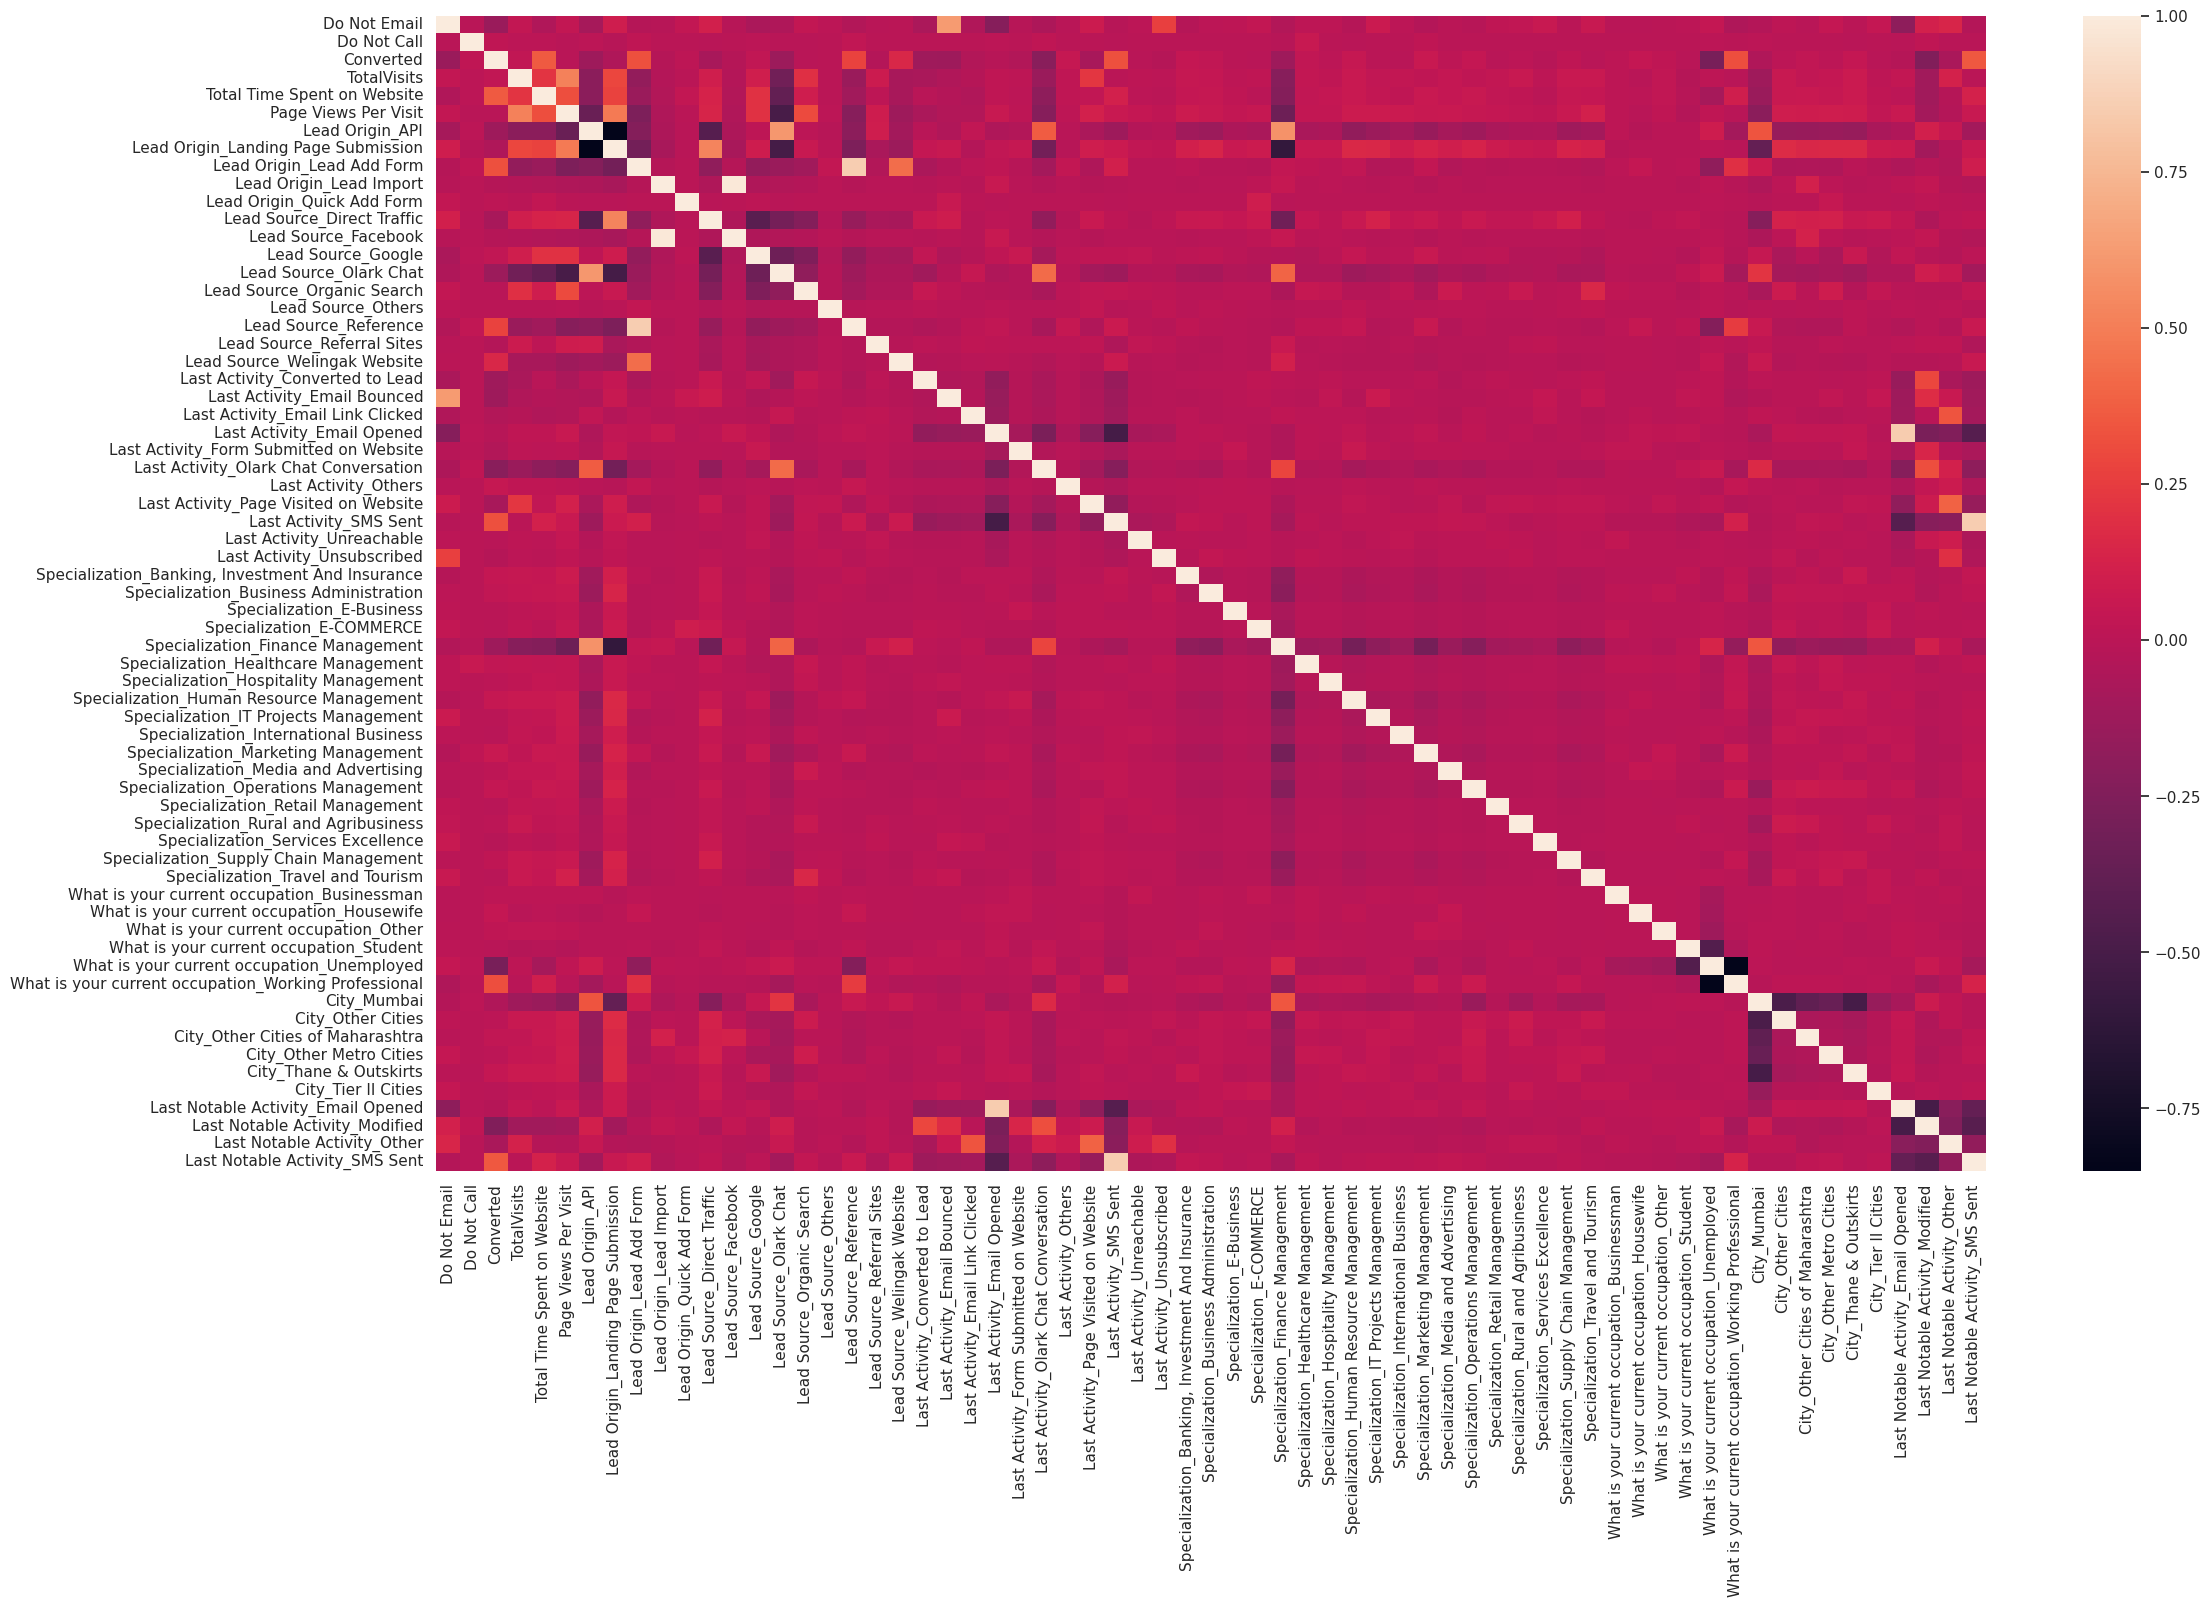

In [376]:
#Analyzing Correlations
plt.figure(figsize = (25,15))
sns.heatmap(df.corr())
plt.show()



## Model Building

Let's now move to model building. As you can see that there are a lot of variables present in the dataset which we cannot deal with. So the best way to approach this is to select a small set of features from this pool of variables using RFE.

In [377]:
# Import 'LogisticRegression' and create a LogisticRegression object

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [378]:
from sklearn.feature_selection import RFE

# Assuming you have your data loaded in X_train and y_train variables

rfe = RFE(estimator=logreg, n_features_to_select=15)  # Corrected line
rfe = rfe.fit(X_train, y_train)


In [379]:
# Let's take a look at which features have been selected by RFE

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 5),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_API', False, 8),
 ('Lead Origin_Landing Page Submission', False, 7),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 38),
 ('Lead Origin_Quick Add Form', False, 50),
 ('Lead Source_Direct Traffic', False, 17),
 ('Lead Source_Facebook', False, 16),
 ('Lead Source_Google', False, 23),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 22),
 ('Lead Source_Others', False, 39),
 ('Lead Source_Reference', False, 29),
 ('Lead Source_Referral Sites', False, 15),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Converted to Lead', False, 18),
 ('Last Activity_Email Bounced', False, 13),
 ('Last Activity_Email Link Clicked', False, 20),
 ('Last Activity_Email Opened', False, 3),
 ('Last Activity_Form Submitted on Website', False, 21),
 ('Last Activity_Olar

In [380]:
# Put all the columns selected by RFE in the variable 'col'

col = X_train.columns[rfe.support_]

Now you have all the variables selected by RFE and since we care about the statistics part, i.e. the p-values and the VIFs, let's use these variables to create a logistic regression model using statsmodels.

In [381]:
# Select only the columns selected by RFE

X_train = X_train[col]

In [382]:
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Others,Last Activity_SMS Sent,Last Activity_Unsubscribed,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Modified
1871,0,0.000000,0.000000,0.000000,0,1,0,0,0,0,0,0,1,0,0
6795,0,0.028369,0.214349,0.024182,0,0,0,0,0,0,0,0,1,0,0
3516,0,0.035461,0.046655,0.045455,0,1,0,0,0,0,0,0,1,0,0
8105,0,0.035461,0.541373,0.090909,0,0,0,0,1,0,0,0,1,0,0
3934,0,0.000000,0.000000,0.000000,0,1,0,0,0,0,0,0,1,0,1


In [383]:
# Import statsmodels

import statsmodels.api as sm

In [384]:
# Fit a logistic Regression model on X_train after adding a constant and output the summary

X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2709.0
Date:                Mon, 20 May 2024   Deviance:                       5418.0
Time:                        21:53:31   Pearson chi2:                 7.83e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3884
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0515      0.543     -1.938      0.053      -2.115       0.012
Do Not Email                                            -1.3752      0.179     -7.662      0.000      -1.727      -1.023
TotalVisits                                              3.9269      1.272      3.087      0.002       1.434       6.420
Total Time Spent on Website                              4.6544      0.165     28.141      0.000       4.330       4.979
Page Views Per Visit                                    -3.1662      1.282     -2.471      0.013      -5.678      -0.654
Lead Origin_Lead Add Form                                3.7359      0.201     18.611      0.000       3.342       4.129
Lead Source_Olark Chat                                   1.0191      0.115      8.877      0.000       0.794       1.244
Lead Source_Welingak Website                             2.0440      0.743      2.751      0.006       0.588       3.500
Last Activity_Others                                     2.2059      0.496      4.448      0.000       1.234       3.178
Last Activity_SMS Sent                                   1.3740      0.074     18.642      0.000       1.230       1.518
Last Activity_Unsubscribed                               1.0589      0.460      2.302      0.021       0.157       1.960
What is your current occupation_Housewife               22.0753   1.37e+04      0.002      0.999   -2.68e+04    2.68e+04
What is your current occupation_Student                 -0.7838      0.578     -1.356      0.175      -1.916       0.349
What is your current occupation_Unemployed              -1.1804      0.534     -2.210      0.027      -2.227      -0.134
What is your current occupation_Working Professional     1.6677      0.564      2.955      0.003       0.562       2.774
Last Notable Activity_Modified                          -1.0145      0.078    -13.043      0.000      -1.167      -0.862
========================================================================================================================
"""

There are quite a few variable which have a p-value greater than `0.05`. We will need to take care of them. But first, let's also look at the VIFs.

In [385]:
# Import 'variance_inflation_factor'

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [386]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,What is your current occupation_Unemployed,6.54
3,Page Views Per Visit,4.28
1,TotalVisits,2.57
2,Total Time Spent on Website,2.24
5,Lead Source_Olark Chat,2.01
14,Last Notable Activity_Modified,1.73
4,Lead Origin_Lead Add Form,1.65
13,What is your current occupation_Working Profes...,1.63
8,Last Activity_SMS Sent,1.57
6,Lead Source_Welingak Website,1.27


VIFs seem to be in a decent range except for three variables.



In [387]:
#X_train.drop('Lead Source_Reference', axis = 1, inplace = True)

In [388]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2709.0
Date:                Mon, 20 May 2024   Deviance:                       5418.0
Time:                        21:53:32   Pearson chi2:                 7.83e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3884
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0515      0.543     -1.938      0.053      -2.115       0.012
Do Not Email                                            -1.3752      0.179     -7.662      0.000      -1.727      -1.023
TotalVisits                                              3.9269      1.272      3.087      0.002       1.434       6.420
Total Time Spent on Website                              4.6544      0.165     28.141      0.000       4.330       4.979
Page Views Per Visit                                    -3.1662      1.282     -2.471      0.013      -5.678      -0.654
Lead Origin_Lead Add Form                                3.7359      0.201     18.611      0.000       3.342       4.129
Lead Source_Olark Chat                                   1.0191      0.115      8.877      0.000       0.794       1.244
Lead Source_Welingak Website                             2.0440      0.743      2.751      0.006       0.588       3.500
Last Activity_Others                                     2.2059      0.496      4.448      0.000       1.234       3.178
Last Activity_SMS Sent                                   1.3740      0.074     18.642      0.000       1.230       1.518
Last Activity_Unsubscribed                               1.0589      0.460      2.302      0.021       0.157       1.960
What is your current occupation_Housewife               22.0753   1.37e+04      0.002      0.999   -2.68e+04    2.68e+04
What is your current occupation_Student                 -0.7838      0.578     -1.356      0.175      -1.916       0.349
What is your current occupation_Unemployed              -1.1804      0.534     -2.210      0.027      -2.227      -0.134
What is your current occupation_Working Professional     1.6677      0.564      2.955      0.003       0.562       2.774
Last Notable Activity_Modified                          -1.0145      0.078    -13.043      0.000      -1.167      -0.862
========================================================================================================================
"""

The variable `Lead Profile_Dual Specialization Student	` also needs to be dropped.

In [389]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,What is your current occupation_Unemployed,6.54
3,Page Views Per Visit,4.28
1,TotalVisits,2.57
2,Total Time Spent on Website,2.24
5,Lead Source_Olark Chat,2.01
14,Last Notable Activity_Modified,1.73
4,Lead Origin_Lead Add Form,1.65
13,What is your current occupation_Working Profes...,1.63
8,Last Activity_SMS Sent,1.57
6,Lead Source_Welingak Website,1.27


In [390]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2709.0
Date:                Mon, 20 May 2024   Deviance:                       5418.0
Time:                        21:53:33   Pearson chi2:                 7.83e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3884
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0515      0.543     -1.938      0.053      -2.115       0.012
Do Not Email                                            -1.3752      0.179     -7.662      0.000      -1.727      -1.023
TotalVisits                                              3.9269      1.272      3.087      0.002       1.434       6.420
Total Time Spent on Website                              4.6544      0.165     28.141      0.000       4.330       4.979
Page Views Per Visit                                    -3.1662      1.282     -2.471      0.013      -5.678      -0.654
Lead Origin_Lead Add Form                                3.7359      0.201     18.611      0.000       3.342       4.129
Lead Source_Olark Chat                                   1.0191      0.115      8.877      0.000       0.794       1.244
Lead Source_Welingak Website                             2.0440      0.743      2.751      0.006       0.588       3.500
Last Activity_Others                                     2.2059      0.496      4.448      0.000       1.234       3.178
Last Activity_SMS Sent                                   1.3740      0.074     18.642      0.000       1.230       1.518
Last Activity_Unsubscribed                               1.0589      0.460      2.302      0.021       0.157       1.960
What is your current occupation_Housewife               22.0753   1.37e+04      0.002      0.999   -2.68e+04    2.68e+04
What is your current occupation_Student                 -0.7838      0.578     -1.356      0.175      -1.916       0.349
What is your current occupation_Unemployed              -1.1804      0.534     -2.210      0.027      -2.227      -0.134
What is your current occupation_Working Professional     1.6677      0.564      2.955      0.003       0.562       2.774
Last Notable Activity_Modified                          -1.0145      0.078    -13.043      0.000      -1.167      -0.862
========================================================================================================================
"""

Drop `What is your current occupation_Housewife`.

In [391]:
X_train.drop('What is your current occupation_Housewife', axis = 1, inplace = True)

In [392]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2712.5
Date:                Mon, 20 May 2024   Deviance:                       5425.0
Time:                        21:53:33   Pearson chi2:                 7.83e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3877
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4278      0.486     -0.881      0.378      -1.380       0.524
Do Not Email                                            -1.3794      0.180     -7.679      0.000      -1.731      -1.027
TotalVisits                                              3.8672      1.268      3.049      0.002       1.381       6.353
Total Time Spent on Website                              4.6502      0.165     28.135      0.000       4.326       4.974
Page Views Per Visit                                    -3.2015      1.282     -2.498      0.013      -5.714      -0.689
Lead Origin_Lead Add Form                                3.7336      0.201     18.617      0.000       3.341       4.127
Lead Source_Olark Chat                                   1.0121      0.115      8.822      0.000       0.787       1.237
Lead Source_Welingak Website                             2.0415      0.743      2.747      0.006       0.585       3.498
Last Activity_Others                                     2.2058      0.496      4.448      0.000       1.234       3.178
Last Activity_SMS Sent                                   1.3735      0.074     18.636      0.000       1.229       1.518
Last Activity_Unsubscribed                               1.0626      0.460      2.310      0.021       0.161       1.964
What is your current occupation_Student                 -1.4019      0.526     -2.664      0.008      -2.433      -0.370
What is your current occupation_Unemployed              -1.7982      0.478     -3.762      0.000      -2.735      -0.861
What is your current occupation_Working Professional     1.0493      0.511      2.052      0.040       0.047       2.051
Last Notable Activity_Modified                          -1.0139      0.078    -13.045      0.000      -1.166      -0.862
========================================================================================================================
"""

In [393]:
#Drop What is your current occupation_Working Professional.

X_train.drop('What is your current occupation_Working Professional', axis = 1, inplace = True)

In [394]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2714.5
Date:                Mon, 20 May 2024   Deviance:                       5429.0
Time:                        21:53:33   Pearson chi2:                 7.65e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3874
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          0.5037      0.193      2.611      0.009       0.126       0.882
Do Not Email                                  -1.3799      0.180     -7.677      0.000      -1.732      -1.028
TotalVisits                                    3.8165      1.266      3.015      0.003       1.335       6.298
Total Time Spent on Website                    4.6474      0.165     28.125      0.000       4.324       4.971
Page Views Per Visit                          -3.1996      1.281     -2.497      0.013      -5.711      -0.688
Lead Origin_Lead Add Form                      3.7319      0.201     18.610      0.000       3.339       4.125
Lead Source_Olark Chat                         1.0103      0.115      8.810      0.000       0.786       1.235
Lead Source_Welingak Website                   2.0416      0.743      2.748      0.006       0.585       3.498
Last Activity_Others                           2.2138      0.495      4.473      0.000       1.244       3.184
Last Activity_SMS Sent                         1.3768      0.074     18.703      0.000       1.233       1.521
Last Activity_Unsubscribed                     1.0649      0.460      2.317      0.021       0.164       1.966
What is your current occupation_Student       -2.3311      0.283     -8.246      0.000      -2.885      -1.777
What is your current occupation_Unemployed    -2.7280      0.176    -15.463      0.000      -3.074      -2.382
Last Notable Activity_Modified                -1.0163      0.078    -13.078      0.000      -1.169      -0.864
==============================================================================================================
"""

In [395]:
#All the p-values are now in the appropriate range. Let's also check the VIFs again in case we had missed something.

## Model Evaluation

Now, both the p-values and VIFs seem decent enough for all the variables. So let's go ahead and make predictions using this final set of features.

In [396]:
# Use 'predict' to predict the probabilities on the train set

y_train_pred = res.predict(sm.add_constant(X_train))
y_train_pred[:10]

1871    0.229008
6795    0.231975
3516    0.267529
8105    0.819505
3934    0.097072
4844    0.915425
3297    0.112592
8071    0.283194
987     0.167348
7423    0.978409
dtype: float64

In [397]:
# Reshaping it into an array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.22900823, 0.23197473, 0.26752893, 0.81950492, 0.09707163,
       0.91542517, 0.11259194, 0.28319414, 0.16734817, 0.97840889])

#### Creating a dataframe with the actual conversion flag and the predicted probabilities

In [398]:
# Create a new dataframe containing the actual conversion flag and the probabilities predicted by the model

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.229008
1,0,0.231975
2,0,0.267529
3,0,0.819505
4,0,0.097072


#### Creating new column 'Predicted' with 1 if Paid_Prob > 0.5 else 0

In [399]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.229008,0
1,0,0.231975,0
2,0,0.267529,0
3,0,0.819505,1
4,0,0.097072,0


Now that you have the probabilities and have also made conversion predictions using them, it's time to evaluate the model.

In [400]:
# Import metrics from sklearn for evaluation

from sklearn import metrics
# Create confusion matrix

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3552  450]
 [ 738 1728]]


In [401]:
# Predicted     not_churn    churn
# Actual
# not_churn        2543      463
# churn            692       1652

In [402]:
# Let's check the overall accuracy

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8163265306122449


In [403]:
# Let's evaluate the other metrics as well

TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [404]:
# Calculate the sensitivity

TP/(TP+FN)

0.7007299270072993

In [405]:
# Calculate the specificity

TN/(TN+FP)

0.8875562218890555

### Finding the Optimal Cutoff

Now 0.5 was just arbitrary to loosely check the model performace. But in order to get good results, you need to optimise the threshold. So first let's plot an ROC curve to see what AUC we get.

In [406]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [407]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

In [408]:
# Import matplotlib to plot the ROC curve

import matplotlib.pyplot as plt

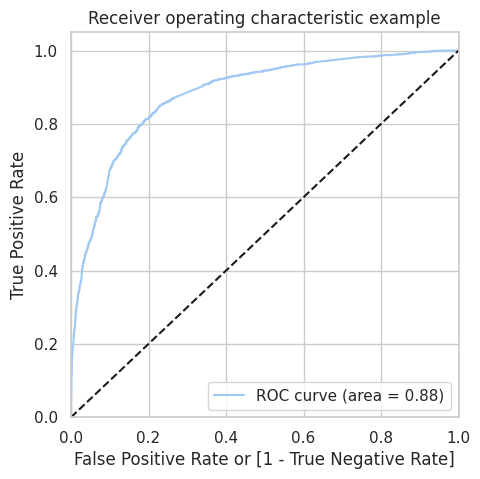

In [409]:
# Call the ROC function

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

The area under the curve of the ROC is 0.86 which is quite good. So we seem to have a good model. Let's also check the sensitivity and specificity tradeoff to find the optimal cutoff point.

In [410]:
# Let's create columns with different probability cutoffs

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.229008,0,1,1,1,0,0,0,0,0,0,0
1,0,0.231975,0,1,1,1,0,0,0,0,0,0,0
2,0,0.267529,0,1,1,1,0,0,0,0,0,0,0
3,0,0.819505,1,1,1,1,1,1,1,1,1,1,0
4,0,0.097072,0,1,0,0,0,0,0,0,0,0,0


In [411]:
# Let's create a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1

    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.604515  0.965531  0.382059
0.2   0.2  0.742270  0.916464  0.634933
0.3   0.3  0.801484  0.837794  0.779110
0.4   0.4  0.814935  0.768856  0.843328
0.5   0.5  0.816327  0.700730  0.887556
0.6   0.6  0.794372  0.590024  0.920290
0.7   0.7  0.774737  0.499189  0.944528
0.8   0.8  0.758503  0.417680  0.968516
0.9   0.9  0.714595  0.270479  0.988256


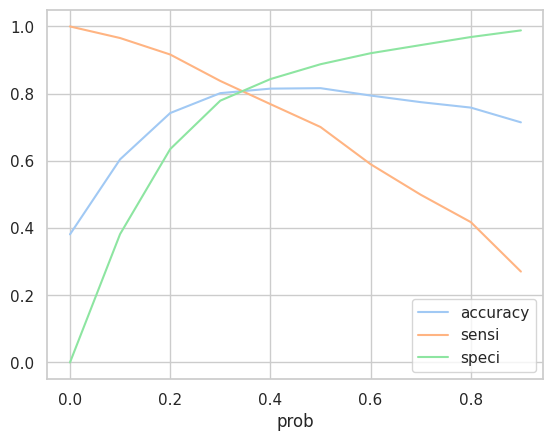

In [412]:
# Let's plot it as well

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

As you can see that around 0.42, you get the optimal values of the three metrics. So let's choose 0.35 as our cutoff now.

In [413]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.229008,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.231975,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.267529,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.819505,1,1,1,1,1,1,1,1,1,1,0,1
4,0,0.097072,0,1,0,0,0,0,0,0,0,0,0,0


In [414]:
# Let's check the accuracy now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8099876314162029

In [415]:
# Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3264,  738],
       [ 491, 1975]])

In [416]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [417]:
# Calculate Sensitivity

TP/(TP+FN)

0.8008921330089214

In [418]:
# Calculate Specificity

TN/(TN+FP)

0.815592203898051

This cutoff point seems good to go!

## Making Predictions on the Test Set

Let's now make predicitons on the test set.

In [419]:
X_test.shape

(2772, 64)

In [420]:
X_test.columns

Index(['Do Not Email', 'Do Not Call', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_API', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Others',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Specialization_Banking, Investment And Ins

In [421]:
X_test.columns

Index(['Do Not Email', 'Do Not Call', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_API', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Others',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Specialization_Banking, Investment And Ins

In [422]:
# Scale the test set as well using just 'transform'

X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [423]:
# Select the columns in X_train for X_test as well

X_test = X_test[col]
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Others,Last Activity_SMS Sent,Last Activity_Unsubscribed,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Modified
4269,0,0.014184,0.091549,0.036364,0,0,0,0,1,0,0,0,1,0,0
2376,0,0.014184,0.341989,0.018182,0,0,0,0,1,0,0,0,1,0,0
7766,0,0.014184,0.698504,0.036364,0,0,0,0,0,0,0,0,1,0,0
9199,0,0.000000,0.000000,0.000000,0,1,0,0,0,0,0,0,1,0,1
4359,0,0.021277,0.611356,0.054545,0,0,0,0,0,0,0,0,0,1,0


In [424]:
# Add a constant to X_test

X_test_sm = sm.add_constant(X_test[col])

In [425]:
# Check X_test_sm

X_test_sm

,const,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Others,Last Activity_SMS Sent,Last Activity_Unsubscribed,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Modified
4269,1.0,0,0.014184,0.091549,0.036364,0,0,0,0,1,0,0,0,1,0,0
2376,1.0,0,0.014184,0.341989,0.018182,0,0,0,0,1,0,0,0,1,0,0
7766,1.0,0,0.014184,0.698504,0.036364,0,0,0,0,0,0,0,0,1,0,0
9199,1.0,0,0.000000,0.000000,0.000000,0,1,0,0,0,0,0,0,1,0,1
4359,1.0,0,0.021277,0.611356,0.054545,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8649,1.0,0,0.106383,0.127641,0.027273,0,0,0,0,0,0,0,0,1,0,0
2152,1.0,0,0.021277,0.368398,0.054545,0,0,0,0,0,0,0,0,1,0,1
7101,1.0,0,0.000000,0.000000,0.000000,0,1,0,0,0,0,0,0,1,0,0
5331,1.0,1,0.021277,0.707746,0.054545,0,0,0,0,0,0,0,0,1,0,1


In [426]:
X_test.columns

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Others', 'Last Activity_SMS Sent',
       'Last Activity_Unsubscribed',
       'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Modified'],
      dtype='object')

In [427]:
X_test.shape

(2772, 15)

In [428]:
# Select the columns in X_train for X_test as well

X_test = X_test[col]
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Others,Last Activity_SMS Sent,Last Activity_Unsubscribed,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Modified
4269,0,0.014184,0.091549,0.036364,0,0,0,0,1,0,0,0,1,0,0
2376,0,0.014184,0.341989,0.018182,0,0,0,0,1,0,0,0,1,0,0
7766,0,0.014184,0.698504,0.036364,0,0,0,0,0,0,0,0,1,0,0
9199,0,0.000000,0.000000,0.000000,0,1,0,0,0,0,0,0,1,0,1
4359,0,0.021277,0.611356,0.054545,0,0,0,0,0,0,0,0,0,1,0


In [429]:
# Add a constant to X_test

X_test_sm = sm.add_constant(X_test[col])
# Check X_test_sm

X_test_sm

,const,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Others,Last Activity_SMS Sent,Last Activity_Unsubscribed,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Modified
4269,1.0,0,0.014184,0.091549,0.036364,0,0,0,0,1,0,0,0,1,0,0
2376,1.0,0,0.014184,0.341989,0.018182,0,0,0,0,1,0,0,0,1,0,0
7766,1.0,0,0.014184,0.698504,0.036364,0,0,0,0,0,0,0,0,1,0,0
9199,1.0,0,0.000000,0.000000,0.000000,0,1,0,0,0,0,0,0,1,0,1
4359,1.0,0,0.021277,0.611356,0.054545,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8649,1.0,0,0.106383,0.127641,0.027273,0,0,0,0,0,0,0,0,1,0,0
2152,1.0,0,0.021277,0.368398,0.054545,0,0,0,0,0,0,0,0,1,0,1
7101,1.0,0,0.000000,0.000000,0.000000,0,1,0,0,0,0,0,0,1,0,0
5331,1.0,1,0.021277,0.707746,0.054545,0,0,0,0,0,0,0,0,1,0,1


In [430]:
X_test.columns

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Others', 'Last Activity_SMS Sent',
       'Last Activity_Unsubscribed',
       'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Modified'],
      dtype='object')

In [431]:
X_test.shape

(2772, 15)

In [432]:
# Drop the required columns from X_test as well

X_test.drop([ 'What is your current occupation_Housewife',
             'What is your current occupation_Working Professional'], axis = 1, inplace = True)

In [433]:
y_test_pred = res.predict(sm.add_constant(X_test, prepend=True))


In [434]:
# Make predictions on the test set and store it in the variable 'y_test_pred'
y_test_pred = res.predict(sm.add_constant(X_test, prepend=True))

#y_test_pred = res.predict(sm.add_constant(X_test))

In [435]:
y_test_pred[:10]

4269    0.381259
2376    0.676530
7766    0.723077
9199    0.097072
4359    0.962732
9186    0.816161
1631    0.540630
8963    0.298721
8007    0.067220
5324    0.378657
dtype: float64

In [436]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)
# Let's see the head

y_pred_1.head()

,0
4269,0.381259
2376,0.676530
7766,0.723077
9199,0.097072
4359,0.962732


In [437]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
# Check 'y_pred_final'

y_pred_final.head()

,Converted,0
0,1,0.381259
1,1,0.676530
2,1,0.723077
3,0,0.097072
4,1,0.962732


In [438]:
# Rename the column

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
# Let's see the head of y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob
0,1,0.381259
1,1,0.676530
2,1,0.723077
3,0,0.097072
4,1,0.962732


In [439]:
# Make predictions on the test set using 0.45 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.42 else 0)
# Check y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,1,0.381259,0
1,1,0.676530,1
2,1,0.723077,1
3,0,0.097072,0
4,1,0.962732,1


In [440]:
# Let's check the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8124098124098124

In [441]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1446,  231],
       [ 289,  806]])

In [442]:
TP = confusion2[1,1] # true positive
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [443]:
# Calculate sensitivity
TP / float(TP+FN)

0.7360730593607306

In [444]:
# Calculate specificity
TN / float(TN+FP)

0.8622540250447227

In [445]:
#Precision-Recall View
#Let's now also build the training model using the precision-recall view

#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3552,  450],
       [ 738, 1728]])

##### Precision
TP / TP + FP

In [446]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7933884297520661

In [447]:
#Recall
#TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7007299270072993

In [448]:
#Precision and recall tradeoff
from sklearn.metrics import precision_recall_curve
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       0
 2       0
 3       0
 4       0
        ..
 6463    1
 6464    1
 6465    1
 6466    0
 6467    0
 Name: Converted, Length: 6468, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       0
        ..
 6463    0
 6464    1
 6465    1
 6466    0
 6467    0
 Name: Predicted, Length: 6468, dtype: int64)

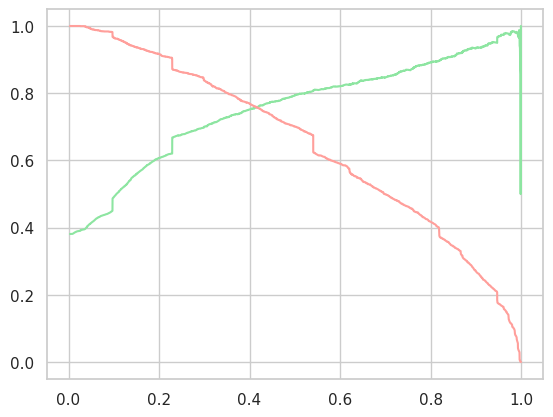

In [449]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [450]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.44 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.229008,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.231975,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.267529,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.819505,1,1,1,1,1,1,1,1,1,1,0,1
4,0,0.097072,0,1,0,0,0,0,0,0,0,0,0,0


In [451]:
# Let's check the accuracy now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8174087816944959

In [452]:
# Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3457,  545],
       [ 636, 1830]])

In [453]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [454]:
# Calculate Precision

TP/(TP+FP)

0.7705263157894737

In [455]:
# Calculate Recall

TP/(TP+FN)

0.7420924574209246

In [456]:
#This cutoff point seems good to go!


In [457]:

#Making Predictions on the Test Set
#Let's now make predicitons on the test set.

# Make predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = res.predict(sm.add_constant(X_test))

In [458]:
y_test_pred[:10]

4269    0.381259
2376    0.676530
7766    0.723077
9199    0.097072
4359    0.962732
9186    0.816161
1631    0.540630
8963    0.298721
8007    0.067220
5324    0.378657
dtype: float64

In [459]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)

In [460]:
# Let's see the head

y_pred_1.head()

,0
4269,0.381259
2376,0.676530
7766,0.723077
9199,0.097072
4359,0.962732


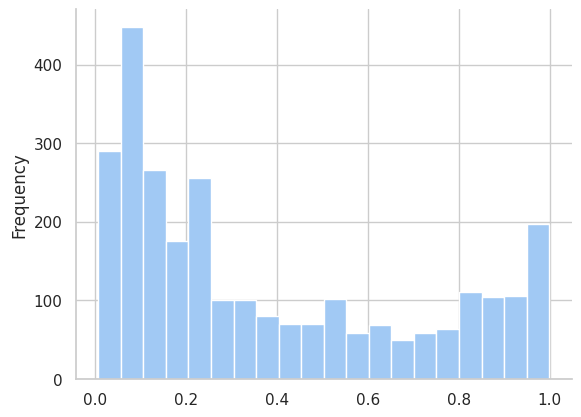

In [461]:
y_pred_1[0].plot(kind='hist', bins=20, title=0)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [462]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [463]:
# Remove index for both dataframes to append them side by side

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
# Check 'y_pred_final'

y_pred_final.head()

,Converted,0
0,1,0.381259
1,1,0.676530
2,1,0.723077
3,0,0.097072
4,1,0.962732


In [464]:
# Rename the column

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
# Let's see the head of y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob
0,1,0.381259
1,1,0.676530
2,1,0.723077
3,0,0.097072
4,1,0.962732


In [465]:
# Make predictions on the test set using 0.44 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.44 else 0)
# Check y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,1,0.381259,0
1,1,0.676530,1
2,1,0.723077,1
3,0,0.097072,0
4,1,0.962732,1


In [466]:
# Let's check the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8134920634920635

In [467]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1464,  213],
       [ 304,  791]])

In [468]:
TP = confusion2[1,1] # true positive
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [469]:
# Calculate Precision

TP/(TP+FP)

0.7878486055776892

In [470]:
# Calculate Recall

TP/(TP+FN)

0.7223744292237443

There are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc.) in order to get a higher lead conversion.
First, sort out the best prospects from the leads you have generated. 'TotalVisits' , 'Total Time Spent on Website' , 'Page Views Per Visit' which contribute most towards the probability of a lead getting converted.
Then, You must keep a list of leads handy so that you can inform them about new courses, services, job offers and future higher studies. Monitor each lead carefully so that you can tailor the information you send to them. Carefully provide job offerings, information or courses that suits best according to the interest of the leads. A proper plan to chart the needs of each lead will go a long way to capture the leads as prospects.
Focus on converted leads. Hold question-answer sessions with leads to extract the right information you need about them. Make further inquiries and appointments with the leads to determine their intention and mentality to join online courses.